In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, spearmanr, ttest_ind
from sklearn.metrics import cohen_kappa_score


In [2]:
data = pd.read_csv("issue-v2-comments_scored.csv", sep=',')

data['created'] = pd.to_datetime(data['created'], format='%a, %d %b %Y %H:%M:%S %z')
data['resolved'] = pd.to_datetime(data['resolved'], format='%a, %d %b %Y %H:%M:%S %z')

data['duration'] = (data['resolved'] - data['created']).dt.total_seconds() / 3600  # in hours

print(data['roberta'].value_counts())
print(data['bert'].value_counts())


roberta
neutral     852
negative    370
positive    201
Name: count, dtype: int64
bert
neutral     882
negative    340
positive    201
Name: count, dtype: int64


## Descriptive Statistics

project
camel     186
hadoop    513
hbase     425
impala     79
thrift    220
dtype: int64
roberta  negative  neutral  positive
project                             
camel          40      117        29
hadoop        138      295        80
hbase         110      259        56
impala         14       63         2
thrift         68      118        34
project  roberta 
camel    negative     1563.811431
         neutral      3199.076911
         positive     3514.921954
hadoop   negative     6043.775602
         neutral      4147.663895
         positive     1949.183774
hbase    negative     4369.546194
         neutral      5232.464336
         positive     4677.049747
impala   negative     8725.096806
         neutral      5172.731164
         positive     3872.625556
thrift   negative     7187.593137
         neutral      5813.866841
         positive    12555.765531
Name: duration, dtype: float64


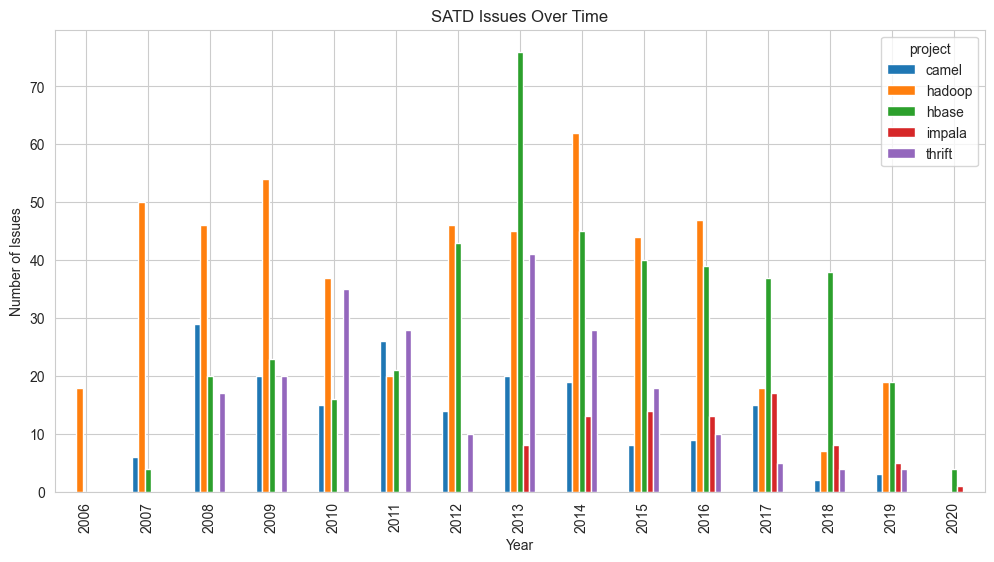

In [3]:
# Count SATD issues by project
satd_counts = data.groupby('project').size()
print(satd_counts)

# Sentiment distribution by project
sentiment_by_project = data.groupby(['project', 'roberta']).size().unstack(fill_value=0)
print(sentiment_by_project)

# Average duration by project and sentiment
avg_duration = data.groupby(['project', 'roberta'])['duration'].mean()
print(avg_duration)

data['created_year'] = data['created'].dt.year
issues_over_time = data.groupby(['project', 'created_year']).size().unstack(fill_value=0)

issues_over_time.T.plot(kind='bar', figsize=(12, 6), title="SATD Issues Over Time")
plt.ylabel("Number of Issues")
plt.xlabel("Year")
plt.show()


## Temporal Trends

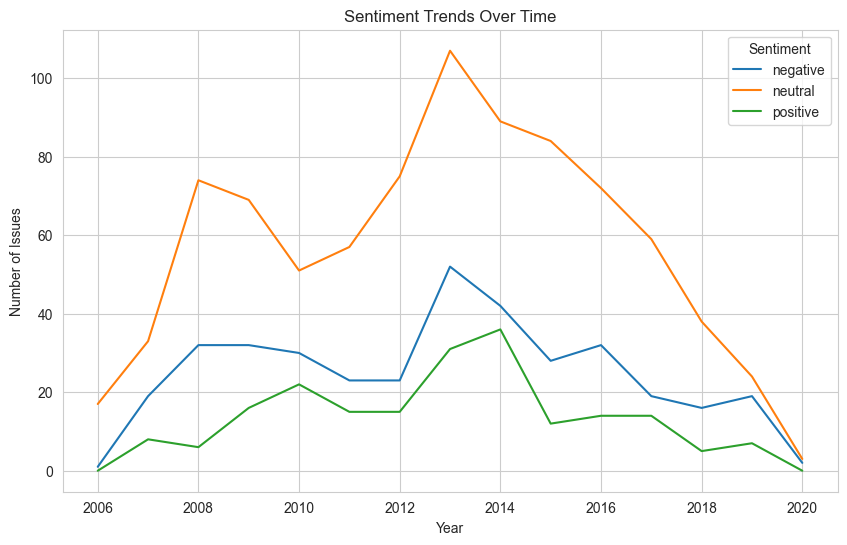

In [4]:
# Sentiment trends
sentiment_trends = data.groupby(['created_year', 'roberta']).size().unstack(fill_value=0)

sentiment_trends.plot(kind='line', figsize=(10, 6), title="Sentiment Trends Over Time")
plt.ylabel("Number of Issues")
plt.xlabel("Year")
plt.legend(title="Sentiment")
plt.show()


## Statistical Tests

In [8]:
# Spearman correlation between duration and sentiment
data['roberta_numeric'] = data['roberta'].map({'positive': 1, 'neutral': 0, 'negative': -1})
correlation, p_value = spearmanr(data['duration'], data['roberta_numeric'])
print(f"Spearman Correlation: {correlation}, P-value: {p_value}")


Spearman Correlation: -0.05494821667462616, P-value: 0.038215304262765724


In [9]:
# Contingency table: sentiment vs project
contingency_table = pd.crosstab(data['project'], data['roberta'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square statistic: {chi2}, P-value: {p}")


Chi-square statistic: 22.346698748091626, P-value: 0.004312517310147429


In [10]:
# Cohen's kappa for agreement
agreement = cohen_kappa_score(data['roberta'], data['bert'])
print(f"Cohen's Kappa: {agreement}")


Cohen's Kappa: 0.7198373648922027


## Separating data based on models

In [11]:
# Agreement analysis: RoBERTa vs BERT
from sklearn.metrics import confusion_matrix, cohen_kappa_score

conf_matrix = pd.crosstab(data['roberta'], data['bert'])
print("Confusion Matrix:")
print(conf_matrix)

kappa = cohen_kappa_score(data['roberta'], data['bert'])
print(f"Cohen's Kappa: {kappa}")


Confusion Matrix:
bert      negative  neutral  positive
roberta                              
negative       285       85         0
neutral         53      759        40
positive         2       38       161
Cohen's Kappa: 0.7198373648922027


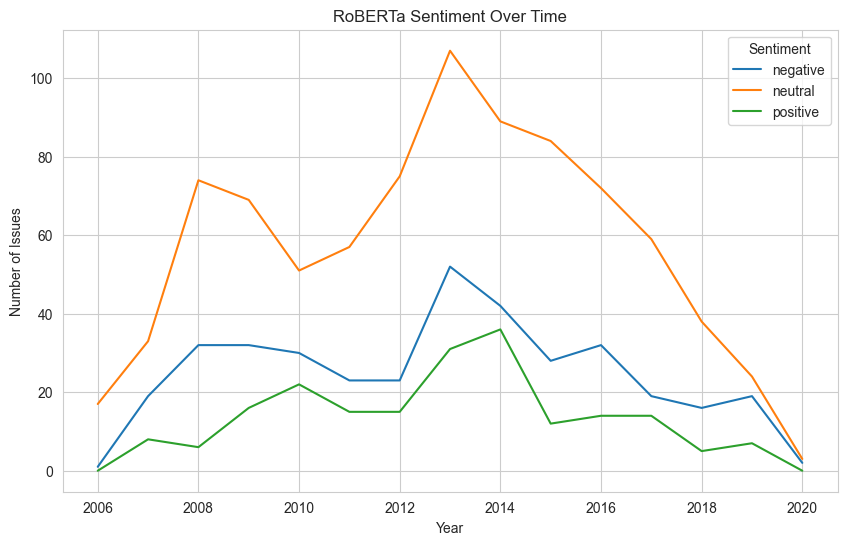

In [13]:
# RoBERTa
roberta_trends = data.groupby(['created_year', 'roberta']).size().unstack(fill_value=0)
roberta_trends.plot(kind='line', figsize=(10, 6), title="RoBERTa Sentiment Over Time")
plt.ylabel("Number of Issues")
plt.xlabel("Year")
plt.legend(title="Sentiment")
plt.show()


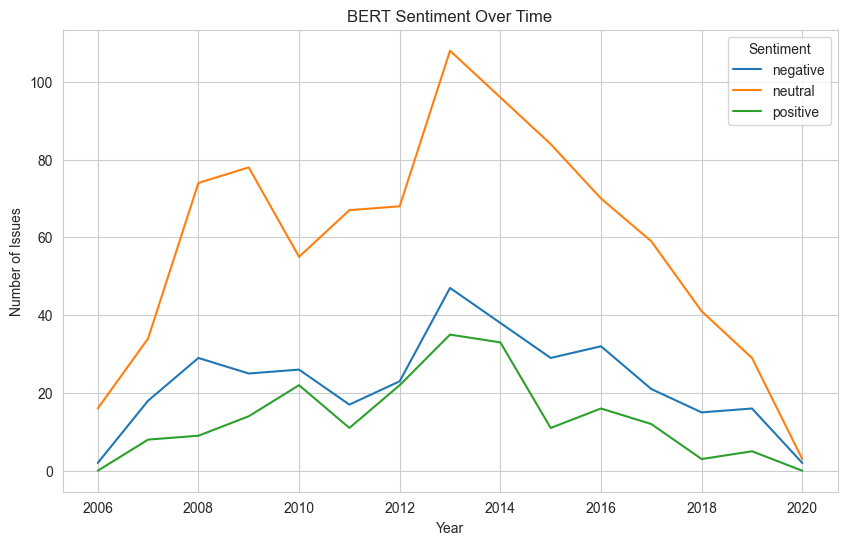

In [14]:
# BERT
bert_trends = data.groupby(['created_year', 'bert']).size().unstack(fill_value=0)
bert_trends.plot(kind='line', figsize=(10, 6), title="BERT Sentiment Over Time")
plt.ylabel("Number of Issues")
plt.xlabel("Year")
plt.legend(title="Sentiment")
plt.show()


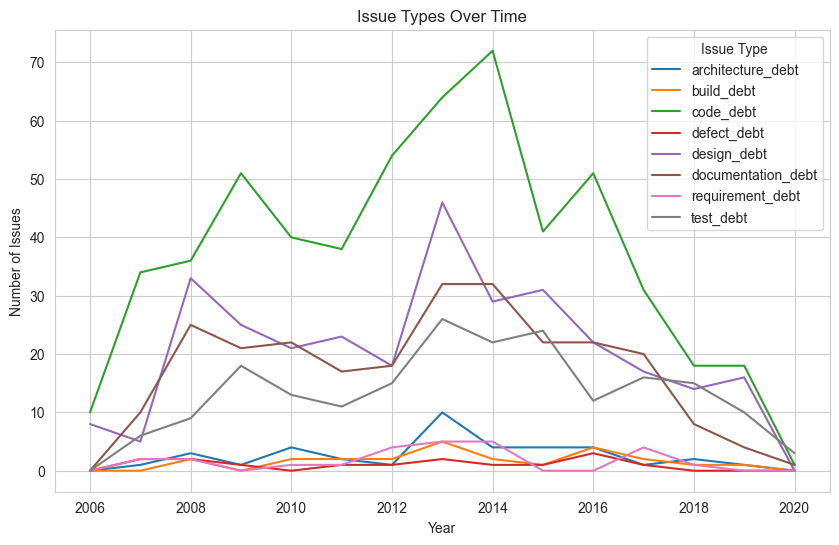

In [16]:
issue_type_trends = data.groupby(['created_year', 'classification']).size().unstack(fill_value=0)
issue_type_trends.plot(kind='line', figsize=(10, 6), title="Issue Types Over Time")
plt.ylabel("Number of Issues")
plt.xlabel("Year")
plt.legend(title="Issue Type")
plt.show()


In [18]:
disagreements = data[data['roberta'] != data['bert']]

#disagreement
disagreement_by_project = disagreements.groupby('project').size()
disagreement_by_issue_type = disagreements.groupby('classification').size()


print("Disagreements by Project:")
print(disagreement_by_project)
print("\nDisagreements by Issue Type:")
print(disagreement_by_issue_type)


Disagreements by Project:
project
camel     25
hadoop    74
hbase     64
impala    10
thrift    45
dtype: int64

Disagreements by Issue Type:
classification
architecture_debt      4
build_debt             7
code_debt             86
defect_debt            1
design_debt           47
documentation_debt    36
requirement_debt       3
test_debt             34
dtype: int64


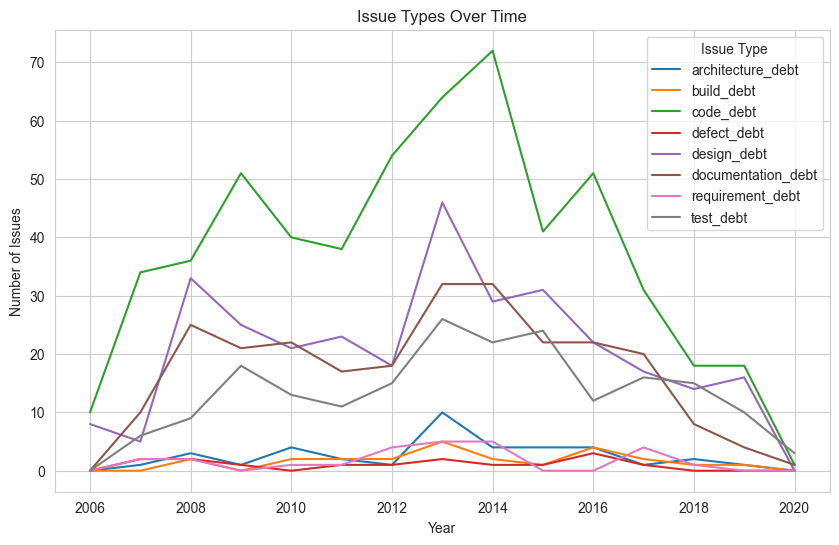

In [19]:
#Volume and Nature SATD by issue type

issue_type_trends = data.groupby(['created_year', 'classification']).size().unstack(fill_value=0)
issue_type_trends.plot(kind='line', figsize=(10, 6), title="Issue Types Over Time")
plt.ylabel("Number of Issues")
plt.xlabel("Year")
plt.legend(title="Issue Type")
plt.show()


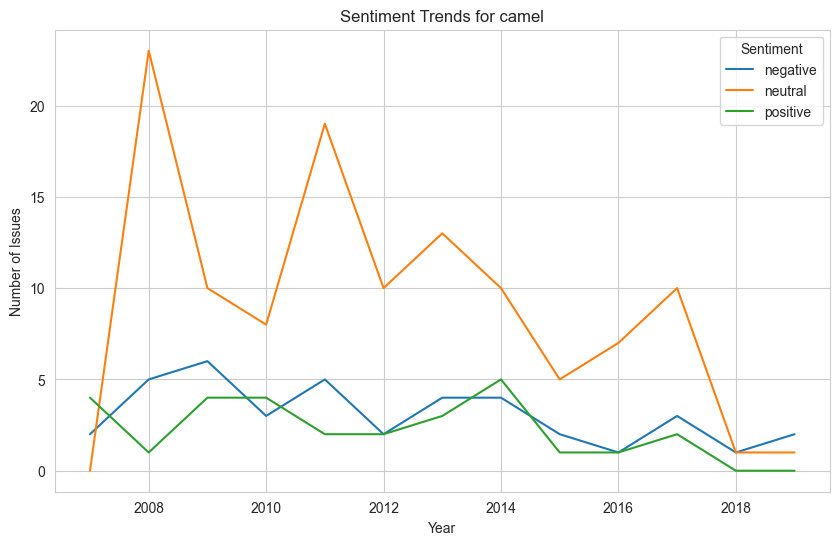

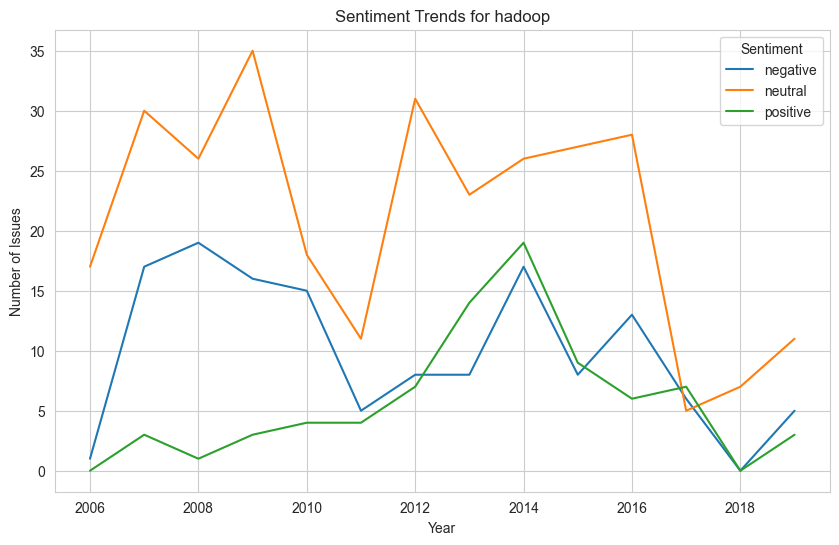

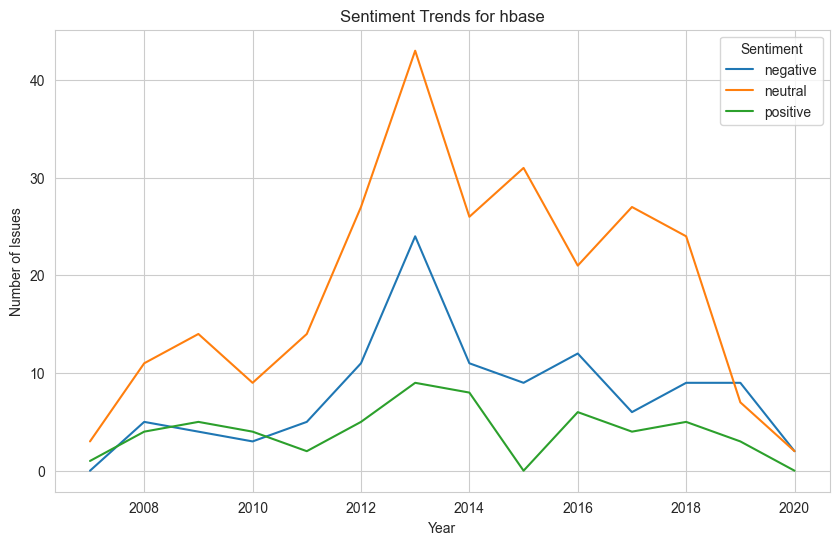

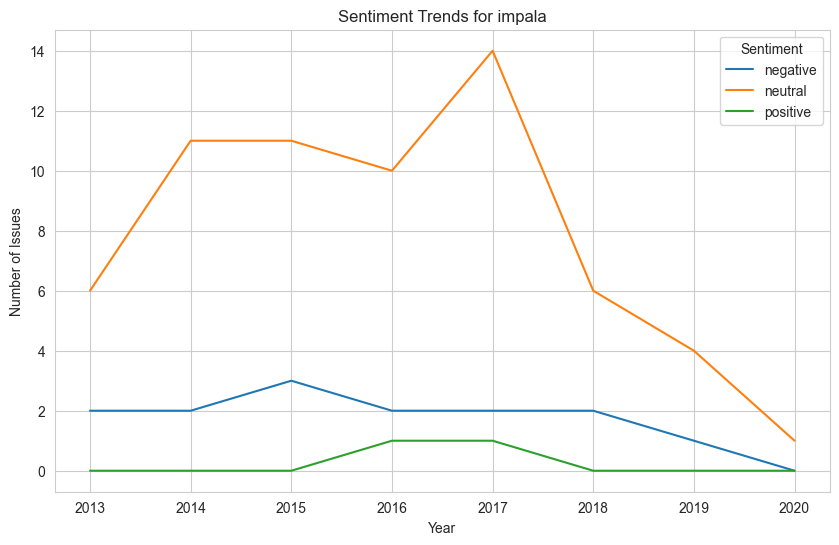

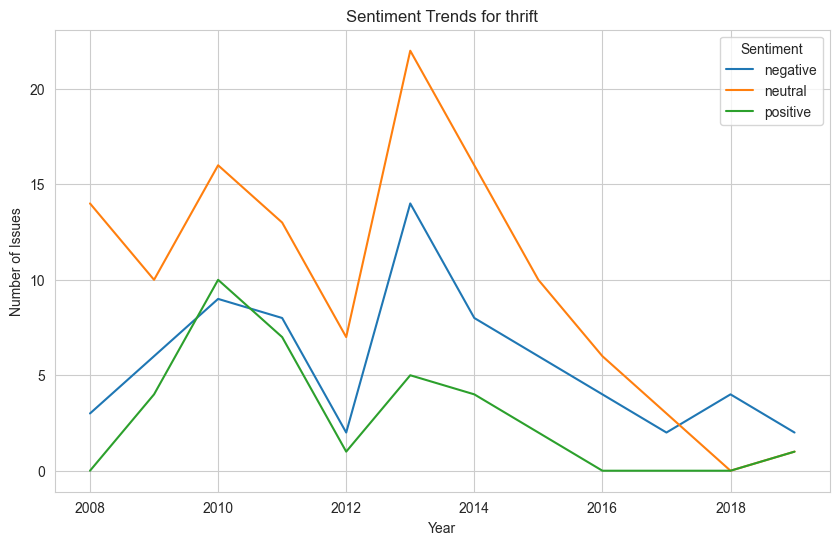

In [20]:
for project in data['project'].unique():
    project_data = data[data['project'] == project]
    sentiment_trends = project_data.groupby(['created_year', 'roberta']).size().unstack(fill_value=0)
    sentiment_trends.plot(kind='line', figsize=(10, 6), title=f"Sentiment Trends for {project}")
    plt.ylabel("Number of Issues")
    plt.xlabel("Year")
    plt.legend(title="Sentiment")
    plt.show()


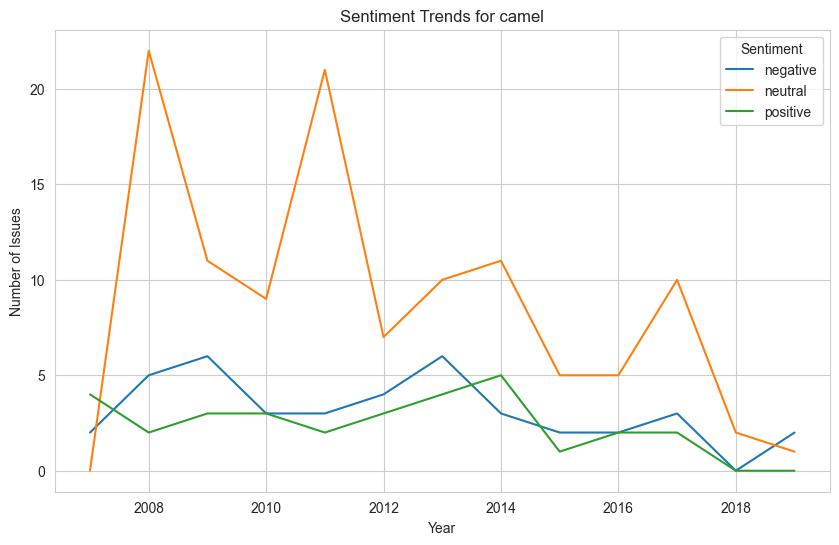

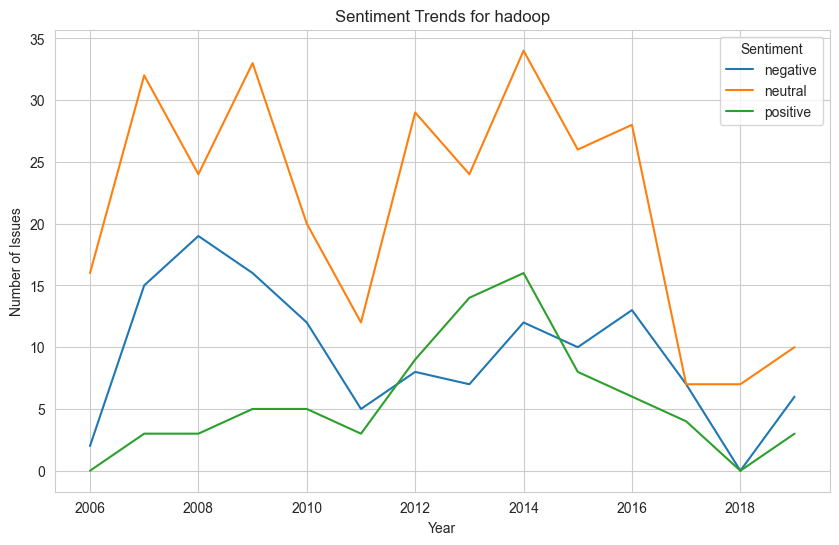

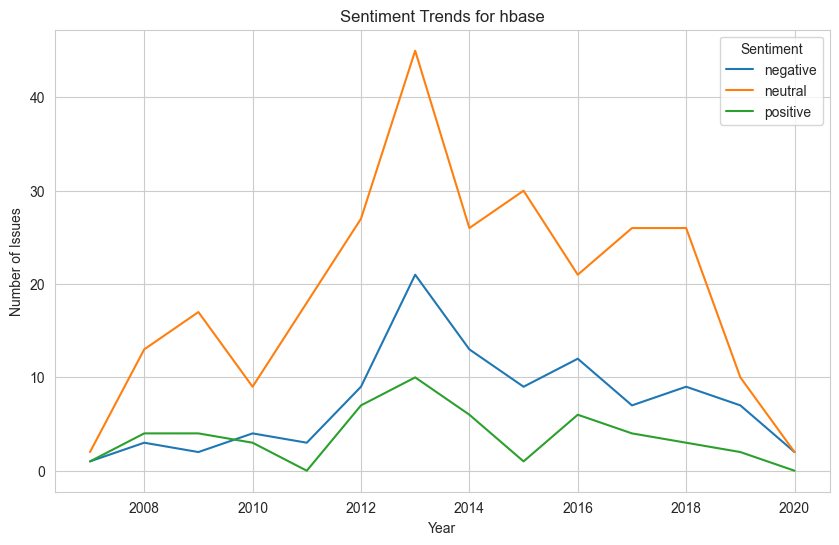

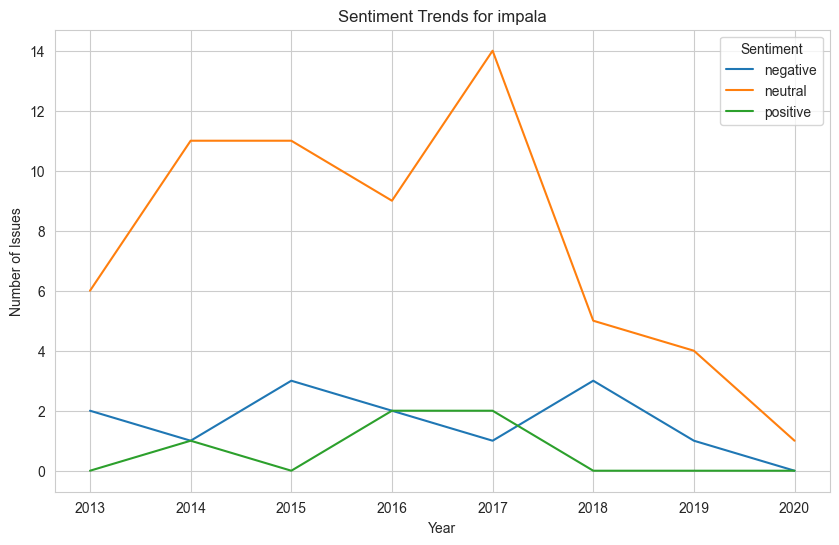

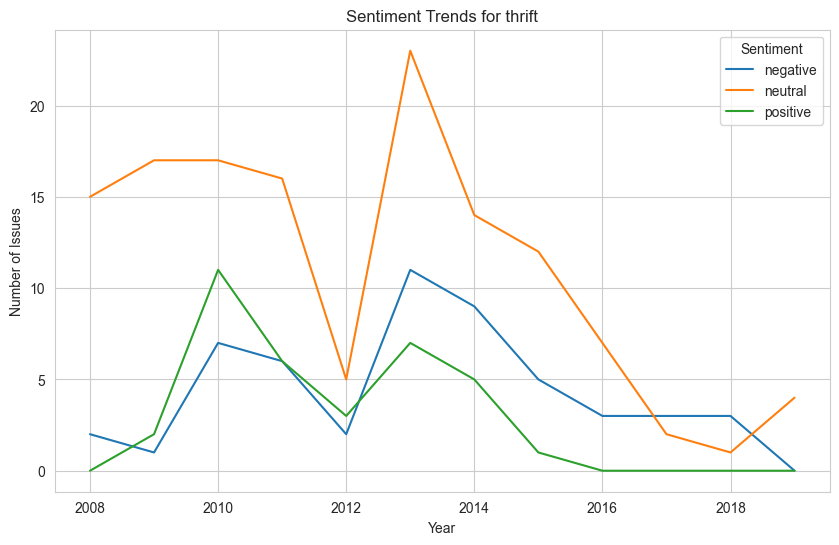

In [21]:
for project in data['project'].unique():
    project_data = data[data['project'] == project]
    sentiment_trends = project_data.groupby(['created_year', 'bert']).size().unstack(fill_value=0)
    sentiment_trends.plot(kind='line', figsize=(10, 6), title=f"Sentiment Trends for {project}")
    plt.ylabel("Number of Issues")
    plt.xlabel("Year")
    plt.legend(title="Sentiment")
    plt.show()


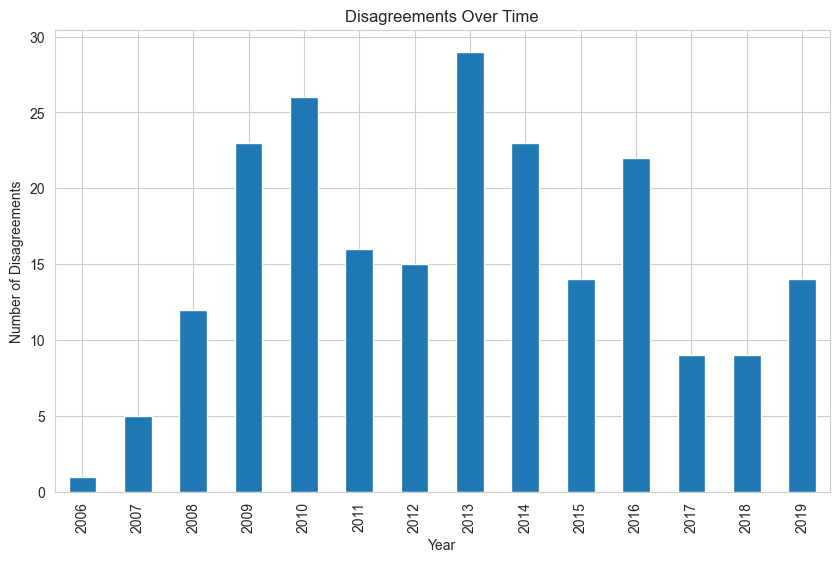

In [22]:
disagreements = data[data['roberta'] != data['bert']]
disagreement_by_year = disagreements.groupby('created_year').size()
disagreement_by_year.plot(kind='bar', figsize=(10, 6), title="Disagreements Over Time")
plt.ylabel("Number of Disagreements")
plt.xlabel("Year")
plt.show()


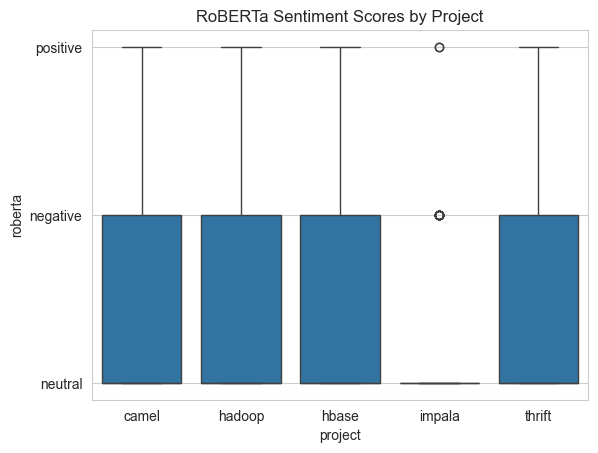

In [24]:
sns.boxplot(x='project', y='roberta', data=data)
plt.title("RoBERTa Sentiment Scores by Project")
plt.show()

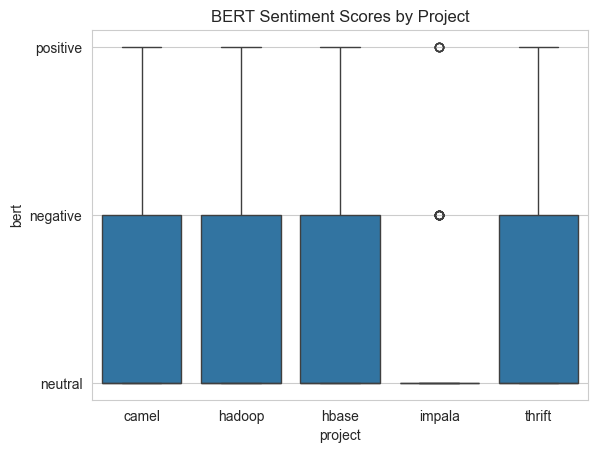

In [25]:
sns.boxplot(x='project', y='bert', data=data)
plt.title("BERT Sentiment Scores by Project")
plt.show()